In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [3]:
col = data.columns
print(col)

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')


In [4]:
y = data.Severity
cols_to_exclude = ['Severity','Accident_ID']
x = data.drop(cols_to_exclude, axis=1)
x.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
4,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


Highly_Fatal_And_Damaging count:  3049
Significant_Damage_And_Serious_Injuries count:  2729
Minor_Damage_And_Injuries count:  2527
Significant_Damage_And_Fatalities count:  1695


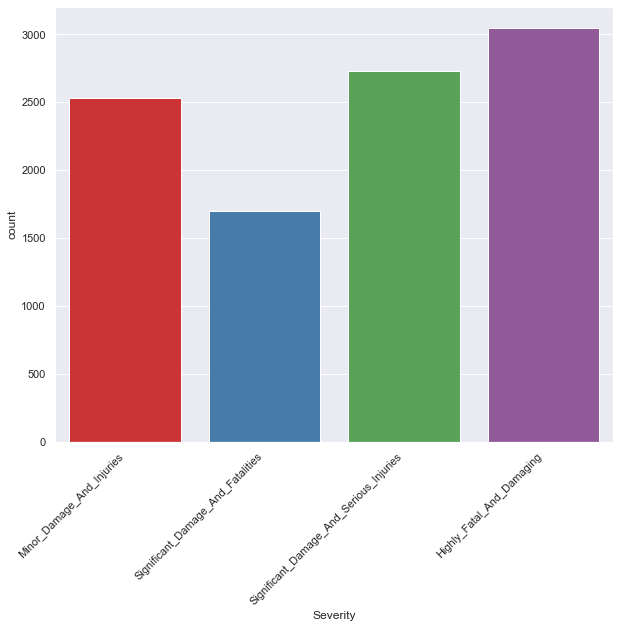

In [5]:
plt.figure(figsize=(10,8))
ax = sns.countplot(y, label='Count', palette='Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

Highly_Fatal_And_Damaging, Significant_Damage_And_Serious_Injuries, Minor_Damage_And_Injuries, Significant_Damage_And_Fatalities = y.value_counts()
print('Highly_Fatal_And_Damaging count: ', Highly_Fatal_And_Damaging)
print('Significant_Damage_And_Serious_Injuries count: ', Significant_Damage_And_Serious_Injuries)
print('Minor_Damage_And_Injuries count: ', Minor_Damage_And_Injuries)
print('Significant_Damage_And_Fatalities count: ', Significant_Damage_And_Fatalities)

In [6]:
x.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

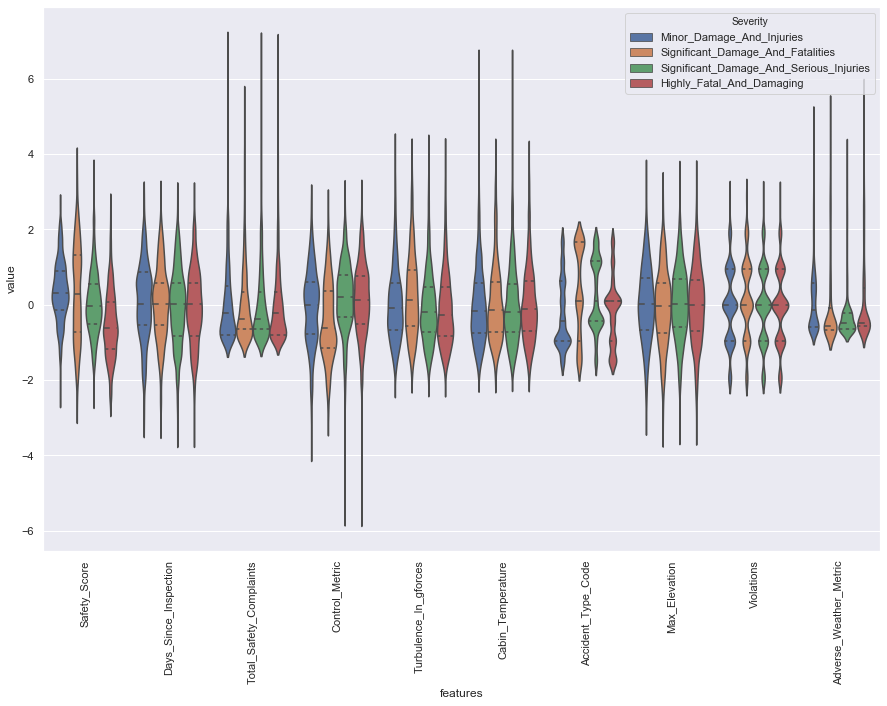

In [7]:
data_y = y
data_x = x
data_x = (data_x - data_x.mean()) / data_x.std()
data_x = pd.concat([data_y, data_x], axis=1)
data_x = pd.melt(data_x,id_vars='Severity',
                    var_name='features',
                    value_name='value')
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="Severity", data=data_x, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

<Figure size 720x720 with 0 Axes>

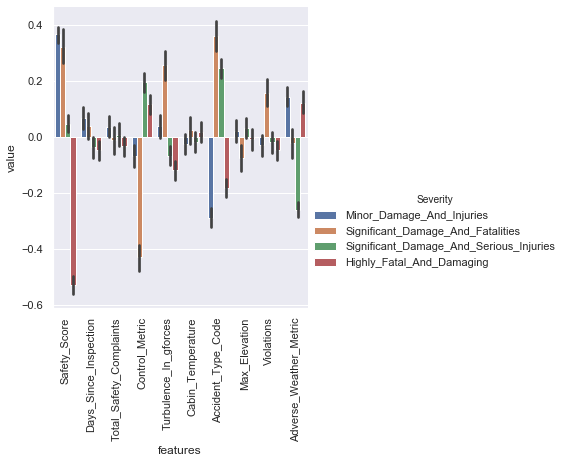

In [8]:
# sns.catplot(x="features", y="value", hue="Severity", kind="swarm", data=data_x)
plt.figure(figsize=(10,10))
sns.catplot(x='features', y='value', hue='Severity', kind='bar', data=data_x)
plt.xticks(rotation=90)

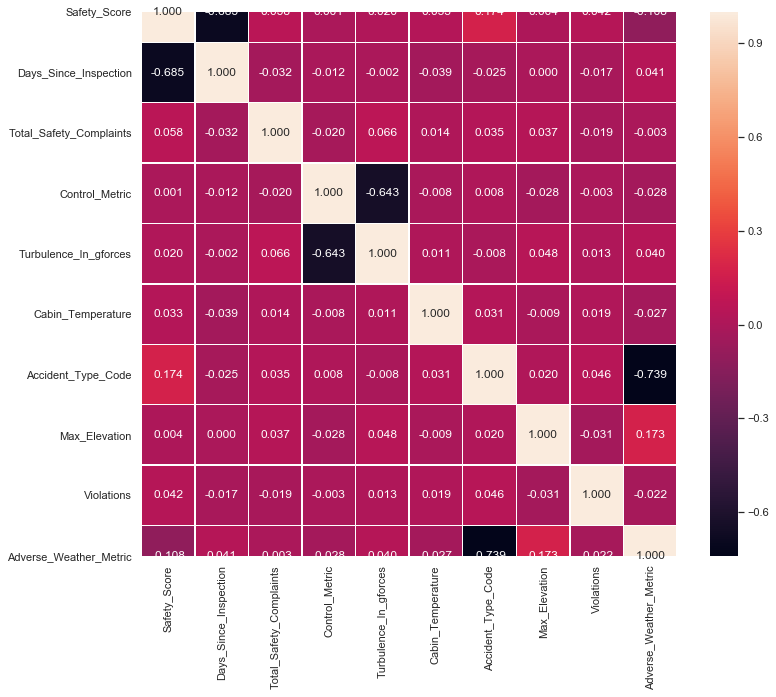

In [9]:
# Normalize the data
data_nor = (x - x.mean()) / x.std()
f, ax = plt.subplots(figsize=(12,10))
h = sns.heatmap(data_nor.corr(), annot=True, linewidths=.5, fmt= '.3f',ax=ax)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

In [15]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Accuracy is:  0.9283333333333333


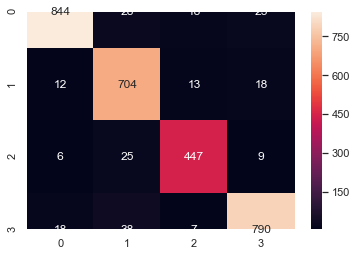

In [16]:
from sklearn.ensemble import RandomForestClassifier

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Select best scored 5 features
select_features = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [29]:
print('Score List: ', select_features.scores_)
print('Feature List: ', x_train.columns)

Score List:  [6.18960491e+03 1.61934766e+01 5.42726751e+01 7.14207224e+02
 4.49416940e+00 3.04147809e-01 4.76251846e+02 3.73662243e+04
 2.09408068e+01 1.10298556e+02]
Feature List:  Index(['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature',
       'Accident_Type_Code', 'Max_Elevation', 'Violations',
       'Adverse_Weather_Metric'],
      dtype='object')


In [20]:
Control_Metric         : 7.14207224e+02
Safety_Score           : 6.18960491e+03
Total_Safety_Complaints: 5.42726751e+01
Accident_Type_Code     : 4.76251846e+02
Turbulence_In_gforces  : 4.49416940e+00
Max_Elevation          : 3.73662243e+04
Cabin_Temperature      : 3.04147809e-01
Violations             : 2.09408068e+01
Days_Since_Inspection  : 1.61934766e+01
Adverse_Weather_Metric : 1.10298556e+02

Accuracy score is:  0.7083333333333334


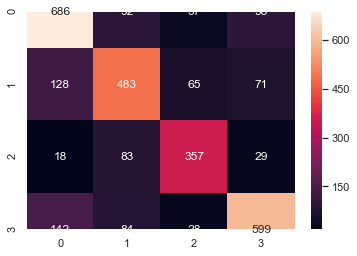

In [30]:
x_train_2 = select_features.transform(x_train)
x_test_2 = select_features.transform(x_test)

clf_rf_2 = RandomForestClassifier()
clf_rf_2 = clf_rf_2.fit(x_train_2, y_train)

ac_2 = accuracy_score(y_test, clf_rf_2.predict(x_test_2))
print('Accuracy score is: ', ac_2)
cm_2 = confusion_matrix(y_test, clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2, annot=True, fmt='d')

In [31]:
from sklearn.feature_selection import RFECV

clf_rf_3 = RandomForestClassifier()
rfecv = RFECV(estimator=clf_rf_3, step=1, cv=5,scoring='accuracy')
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features: ', rfecv.n_features_)
print('Best features: ', x_train.columns[rfecv.support_])

Optimal number of features:  3
Best features:  Index(['Safety_Score', 'Days_Since_Inspection', 'Control_Metric'], dtype='object')


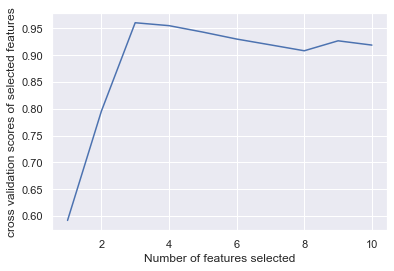

In [32]:
# Plot number of features vs cross-validation scores
plt.figure()
plt.xlabel('Number of features selected')
plt.ylabel('cross validation scores of selected features')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [33]:
# Features Importance in RandomForestClassifier
clf_rf_4 = RandomForestClassifier()
clf_rf_4 = clf_rf_4.fit(x_train, y_train)
importances = clf_rf_4.feature_importances_
importances

array([0.27886671, 0.17954466, 0.03241295, 0.14328211, 0.05911576,
       0.04506467, 0.09522893, 0.04239187, 0.01687418, 0.10721814])

In [38]:
std = np.std([tree.feature_importances_ for tree in clf_rf_4.estimators_], axis=0)
std

array([0.0577345 , 0.05256447, 0.0078442 , 0.04275709, 0.01476226,
       0.01077722, 0.03524954, 0.01092443, 0.00462322, 0.03179141])

In [41]:
indices = np.argsort(importances)[::-1]
indices

array([0, 1, 3, 9, 6, 4, 5, 7, 2, 8])

In [50]:
for f in range(x_train.shape[1]):
    print('feature importance of %s is (%f)' % (x_train.columns[indices[f]], importances[indices[f]]))

feature importance of Safety_Score is (0.278867)
feature importance of Days_Since_Inspection is (0.179545)
feature importance of Control_Metric is (0.143282)
feature importance of Adverse_Weather_Metric is (0.107218)
feature importance of Accident_Type_Code is (0.095229)
feature importance of Turbulence_In_gforces is (0.059116)
feature importance of Cabin_Temperature is (0.045065)
feature importance of Max_Elevation is (0.042392)
feature importance of Total_Safety_Complaints is (0.032413)
feature importance of Violations is (0.016874)


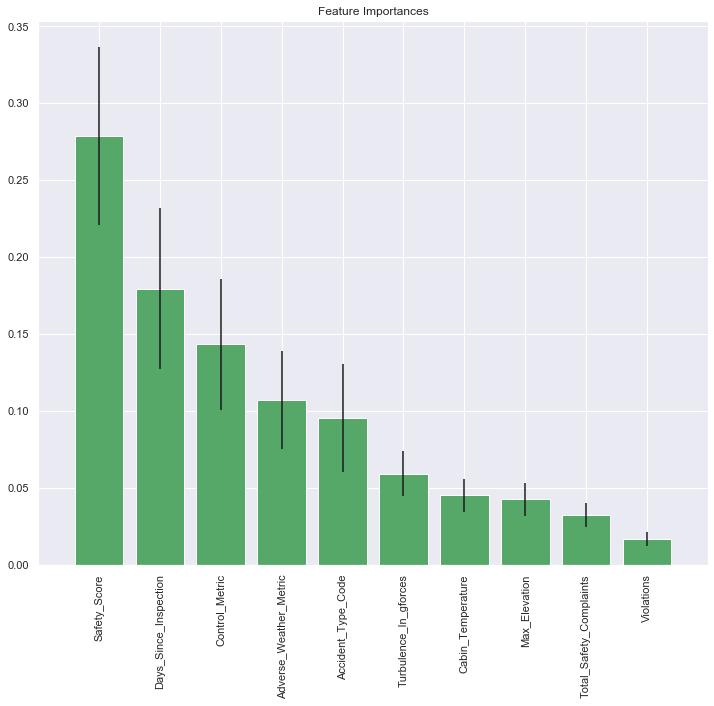

In [52]:
plt.figure(1, figsize=(12,10))
plt.title('Feature Importances')
plt.bar(range(x_train.shape[1]), importances[indices], color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [53]:
# Lets select only the top 3 features
# ['Severity', 'Safety_Score', 'Days_Since_Inspection',
#     'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
#        'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
#        'Violations', 'Adverse_Weather_Metric', 'Accident_ID']
x_top_5 = x.drop(['Turbulence_In_gforces','Cabin_Temperature','Max_Elevation',
                  'Total_Safety_Complaints','Violations'], axis=1)
x_top_5.head()

,Safety_Score,Days_Since_Inspection,Control_Metric,Accident_Type_Code,Adverse_Weather_Metric
0,49.223744,14,71.285324,2,0.424352
1,62.465753,10,72.288058,2,0.352350
2,63.059361,13,66.362808,7,0.003364
3,48.082192,11,74.703737,3,0.211728
4,26.484018,13,47.948952,3,0.176883


In [54]:
x_train_5, x_test_5, y_train_5, y_test_5 = train_test_split(x_top_5, y, test_size=0.3, random_state=42)

Accuracy score is:  0.9503333333333334


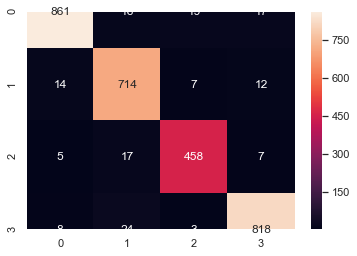

In [55]:
clf_rf_5 = RandomForestClassifier()
clf_rf_5 = clf_rf_5.fit(x_train_5, y_train_5)

ac_5 = accuracy_score(y_test_5, clf_rf_5.predict(x_test_5))
print('Accuracy score is: ', ac_5)
cm_5 = confusion_matrix(y_test_5, clf_rf_5.predict(x_test_5))
sns.heatmap(cm_5, annot=True, fmt='d')